In [36]:
import sys
sys.path.append("..")

from cellmate.image_measure import ImageMeasure
from skimage.io import imread, imsave
import numpy as np
import matplotlib.pyplot as plt
from cellmate.visualize import COLORMAP
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2
color_mont_list = COLORMAP['mont'].list()
color_mont_linear = COLORMAP['mont'].linear()

In [4]:
def show_measure_details(measure):
    pass

## 1. Geometric Feature Extraction

/var/folders/py/kmy_9_hj3791f862dxgf7r_00000gn/T/ipykernel_99082/1733262587.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1, i].scatter(center[1], center[0],marker="o",  s=200, c=color_mont_list(7),)


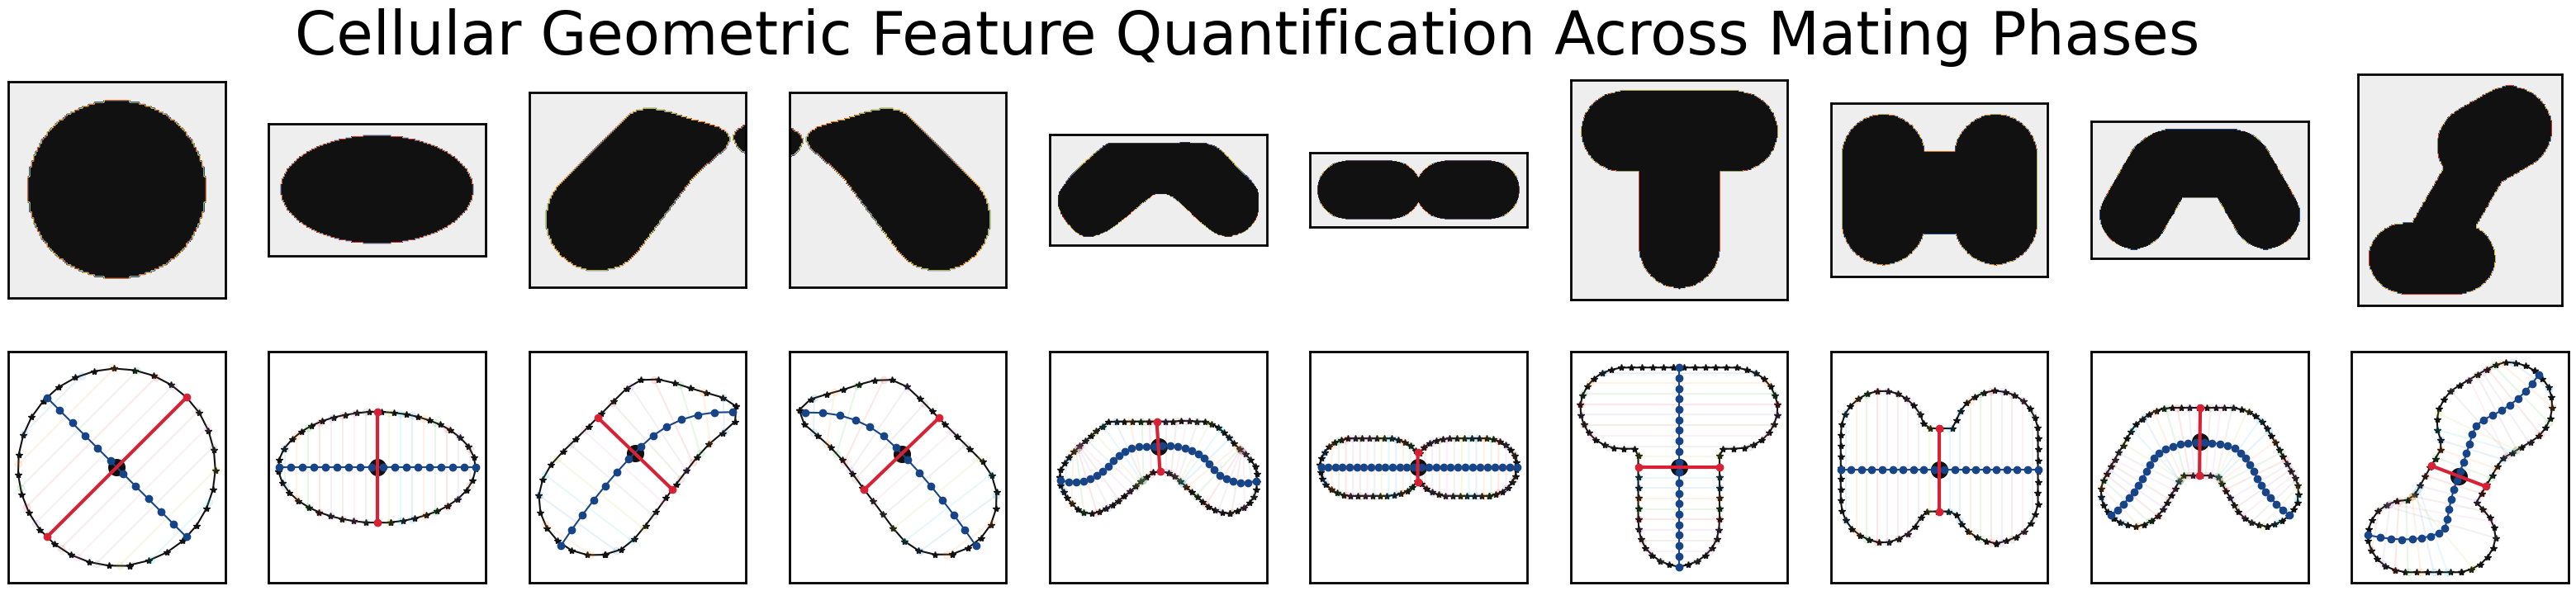

In [2]:
image = imread("./morphologyquantification_createdshape.tif")
measure = ImageMeasure(image, pixel_size=0.5, sampling_interval=5, equidistant=True)
pad = 10

coords = measure.coordinates
skeletons = measure.skeletons
minor_grids = measure.skeleton_minor_grids
centers = measure.centers
bboxes = measure.bboxes
f, axs = plt.subplots(2, len(measure.labels), figsize=(4*len(measure.labels), 8))
for i in range(0, len(coords)):
    bbox = bboxes[i]
    shiftx = bbox[0] - pad
    endx = bbox[2] + pad
    shifty = bbox[1] - pad
    endy = bbox[3] + pad
    coord = coords[i] - [shiftx, shifty]
    coord = np.vstack([coord, coord[0:1]])
    skeleton = skeletons[i] - [shiftx, shifty]
    minor_grid = minor_grids[i] - [shiftx, shifty]
    center = centers[i] - [shiftx, shifty]
    axs[0, i].imshow(image[shiftx:endx, shifty:endy], cmap=color_mont_linear)
    axs[1, i].plot(coord[:,1], coord[:,0],marker="*", c=color_mont_list(7))
    axs[1, i].plot(skeleton[:,1], skeleton[:,0],marker="o", c=color_mont_list(1), label="major axis")
    for j in range(0, len(minor_grid)):
        if j == int(len(minor_grid)/2):
            axs[1, i].plot(minor_grid[j][:,1],minor_grid[j][:,0], marker="o", c=color_mont_list(3), linewidth=3.0, label="minor axis")
        else:
            axs[1, i].plot(minor_grid[j][:,1],minor_grid[j][:,0], marker="o", alpha=0.1,)
    axs[1, i].scatter(center[1], center[0],marker="o",  s=200, c=color_mont_list(7),)
    
    axs[1, i].invert_yaxis()
    axs[1, i].axis('equal')

    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
f.suptitle("Cellular Geometric Feature Quantification Across Mating Phases", fontsize=52)
plt.savefig("created_shape_measure_example.svg")

## 2. Geometric Feature Extraction -- Example

/var/folders/py/kmy_9_hj3791f862dxgf7r_00000gn/T/ipykernel_99082/2683069470.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1, i].scatter(center[1], center[0],marker="o",  s=200, c=color_mont_list(7),)


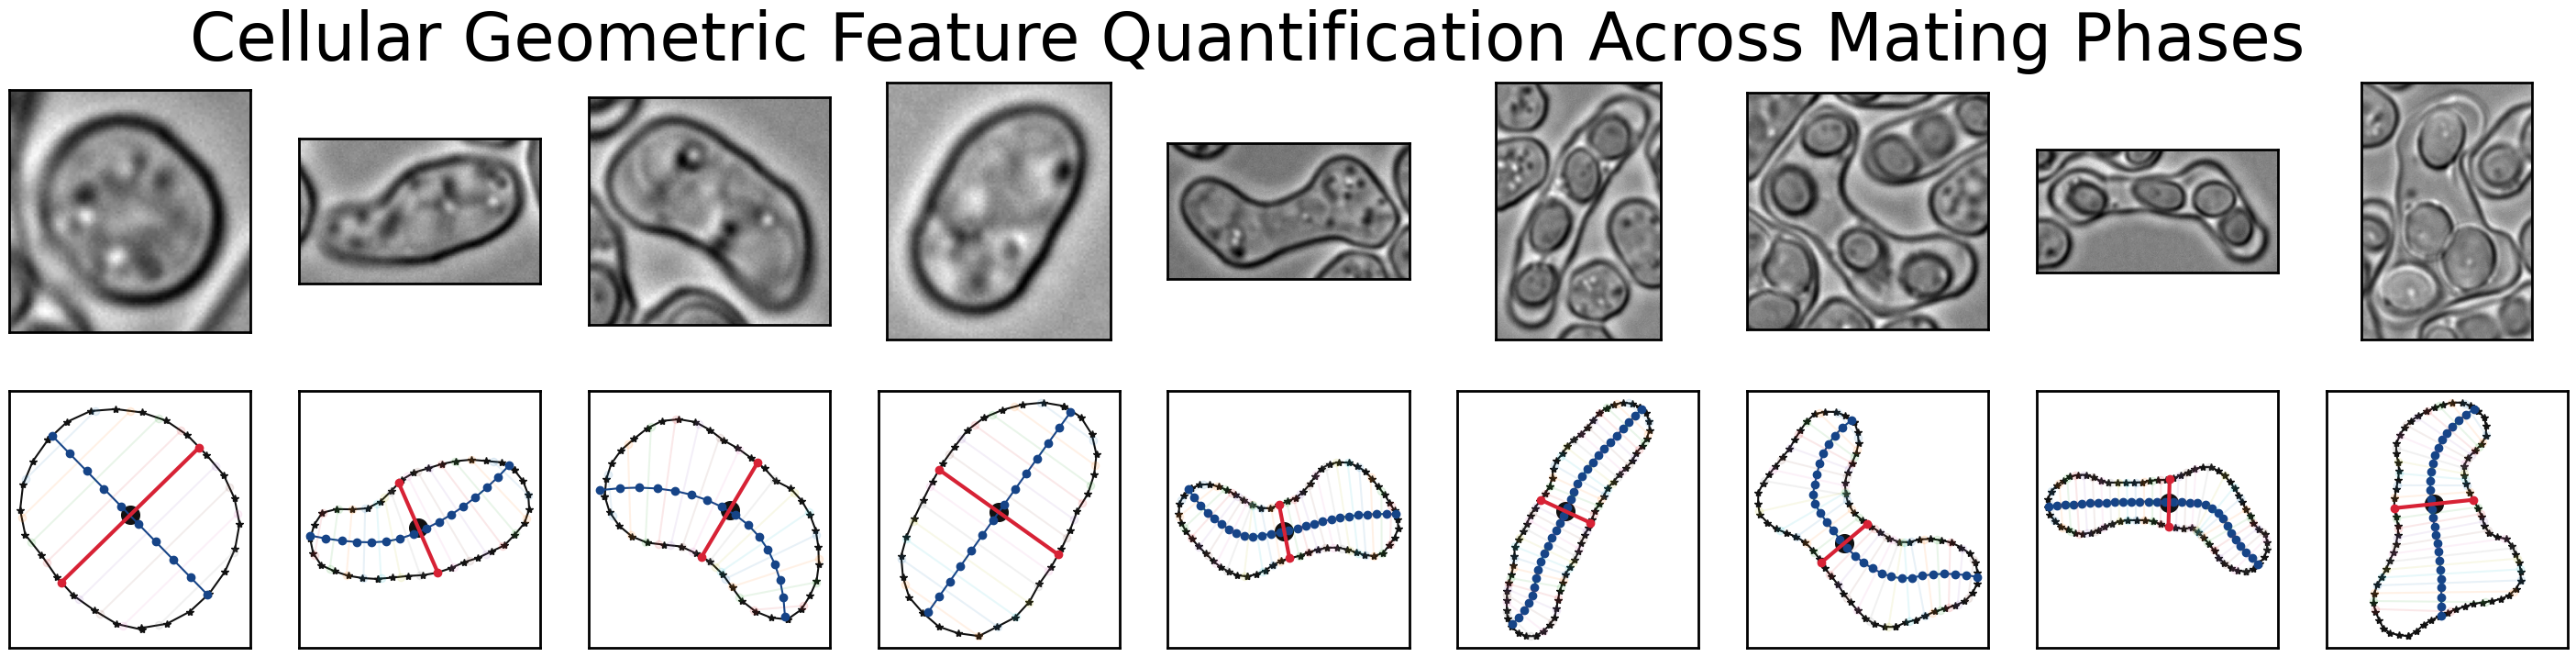

In [5]:
image = imread("./morphology quantification_realexample.tif")
labels = [1101,1105, 1151,1120,4181,4006,4201,4204,3199]
mask = np.isin(image[0], labels)
measure = ImageMeasure(image[0]*mask, pixel_size=0.5, sampling_interval=5, equidistant=True)

coords = measure.coordinates
skeletons = measure.skeletons
minor_grids = measure.skeleton_minor_grids
centers = measure.centers
bboxes = measure.bboxes
f, axs = plt.subplots(2, len(measure.labels), figsize=(4*len(measure.labels), 8))
for i in range(0, len(coords)):
    bbox = bboxes[i]
    shiftx = bbox[0] - pad
    endx = bbox[2] + pad
    shifty = bbox[1] - pad
    endy = bbox[3] + pad
    coord = coords[i] - [shiftx, shifty]
    coord = np.vstack([coord, coord[0:1]])
    skeleton = skeletons[i] - [shiftx, shifty]
    minor_grid = minor_grids[i] - [shiftx, shifty]
    center = centers[i] - [shiftx, shifty]
    axs[0, i].imshow(image[1,shiftx:endx, shifty:endy], cmap="gray")
    axs[1, i].plot(coord[:,1], coord[:,0],marker="*", c=color_mont_list(7))
    axs[1, i].plot(skeleton[:,1], skeleton[:,0],marker="o", c=color_mont_list(1), label="major axis")
    for j in range(0, len(minor_grid)):
        if j == int(len(minor_grid)/2):
            axs[1, i].plot(minor_grid[j][:,1],minor_grid[j][:,0], marker="o", c=color_mont_list(3), linewidth=3.0, label="minor axis")
        else:
            axs[1, i].plot(minor_grid[j][:,1],minor_grid[j][:,0], marker="o", alpha=0.1,)
    axs[1, i].scatter(center[1], center[0],marker="o",  s=200, c=color_mont_list(7),)
    
    axs[1, i].invert_yaxis()
    axs[1, i].axis('equal')

    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
f.suptitle("Cellular Geometric Feature Quantification Across Mating Phases", fontsize=52)
plt.savefig("cell_measure_example.svg")

## 3. Geometric Feature Extraction -- Example

In [118]:
image = imread("./figs/0006.tif")
labels = [1008, 1270]
type_color = [0, 1]

center_label = 1008
pad = 20
mask = np.isin(image[0], labels)
measure = ImageMeasure(image[0]*mask, pixel_size=0.5, sampling_interval=5, equidistant=True)

colors = [mpl.colors.LinearSegmentedColormap.from_list("",color_mont_list([3,0])), 
          mpl.colors.LinearSegmentedColormap.from_list("",color_mont_list([5,0]))]

(0.8431372549019608, 0.13333333333333333, 0.20784313725490197, 1.0)

In [128]:
colors[1](0)

(0.6588235294117647, 0.7843137254901961, 0.2901960784313726, 1.0)

In [119]:
bboxes = []
for label in labels:
    bbox = measure.bbox(label=label)
    bboxes.append(bbox)
bboxes = np.array(bboxes)
shift_x = bboxes[:,0].min() - pad
shift_y = bboxes[:,1].min() - pad
end_x = bboxes[:,2].max() + pad
end_y = bboxes[:,3].max() + pad
cropped_image = image[:, shift_x:end_x, shift_y:end_y]
if center_label is not None:
    center_coord = measure.coordinate(label=center_label)-[shift_x, shift_y]
    center_center = measure.center(label=center_label)-[shift_x, shift_y]

/var/folders/py/kmy_9_hj3791f862dxgf7r_00000gn/T/ipykernel_99082/2545533931.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1].scatter(center[1], center[0], marker="o", s=400, c=color_mont_list(7), zorder=10, edgecolors=color_mont_list(0))


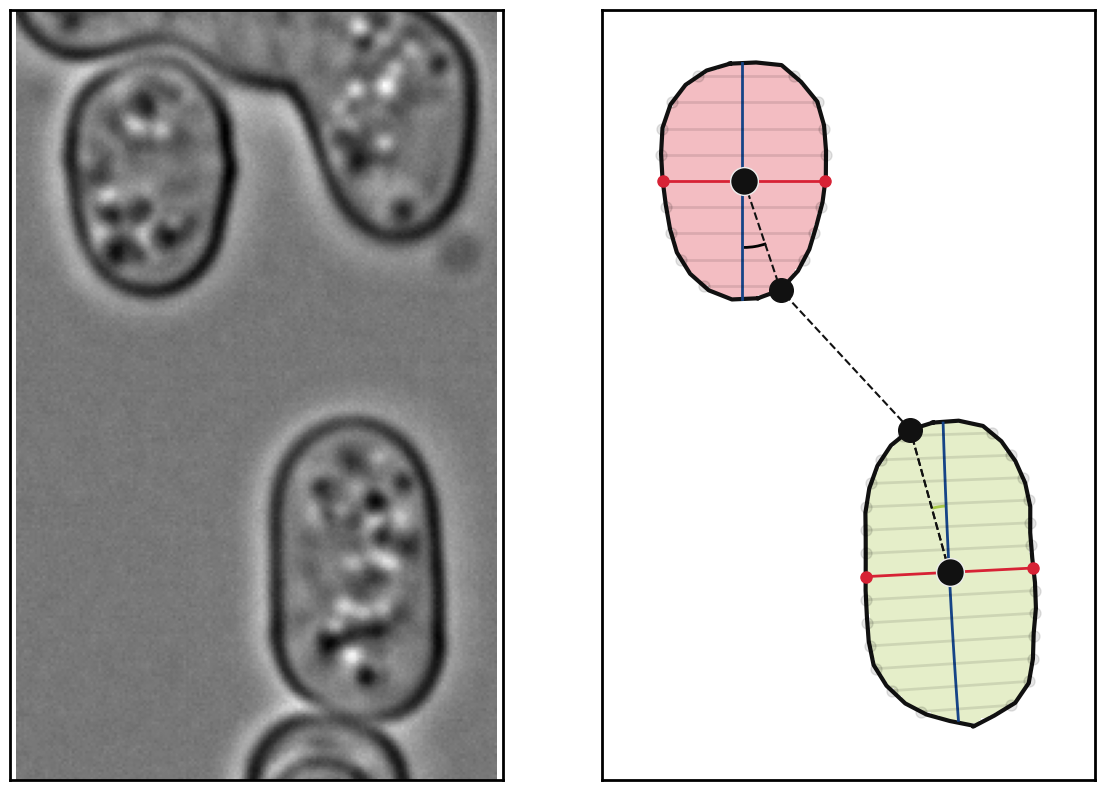

In [135]:
from matplotlib.patches import Arc
f, axs = plt.subplots(1, 2, figsize=(14,10))
axs[0].imshow(cropped_image[1], cmap='gray')
for i in range(0, len(labels)):
    label = labels[i]
    coord = measure.coordinate(label=label)-[shift_x, shift_y]
    coord = np.vstack([coord, coord[0:1]])
    skeleton = measure.skeleton(label=label)-[shift_x, shift_y]
    center = measure.center(label=label)-[shift_x, shift_y]
    minor_grid = measure.skeleton_minor_grid(label=label)-[shift_x, shift_y]

    mymask =np.ma.masked_where((cropped_image[0]!=label), cropped_image[0])
    
    axs[1].imshow(mymask, alpha=0.3, cmap=colors[i])
    axs[1].plot(coord[:, 1], coord[:, 0], c=color_mont_list(7), linewidth=3.0)
    axs[1].plot(skeleton[:, 1], skeleton[:, 0], c=color_mont_list(1), linewidth=2.0, markersize=8,)
    axs[1].scatter(center[1], center[0], marker="o", s=400, c=color_mont_list(7), zorder=10, edgecolors=color_mont_list(0))
    for j in range(0, len(minor_grid)):
        if j == int(len(minor_grid) // 2):
            axs[1].plot(minor_grid[j][:,1], minor_grid[j][:,0], 'o-', c=color_mont_list(3), linewidth=2.0,markersize=8)
        else:
            axs[1].plot(minor_grid[j][:,1], minor_grid[j][:,0], 'o-', c='black', alpha=0.1, linewidth=2.0,markersize=8)

    if label != center_label:
        distance = measure.distance(center_label, label, "label")
        tip_index = measure.tip_index(label=label)
        angles = np.array(measure.between_angle(center_label, label, "label")) * 180/np.pi
        length = coord.shape[0]
        neibor_index = distance[0, 0, 3]
        axs[1].plot([center[1], near_point_neibor[1]], [center[0], near_point_neibor[0]], '--', c=color_mont_list(7))        
        near_point_neibor = coord[neibor_index]
        near_point_center = center_coord[distance[0, 0, 2]]
        near_point = np.array([near_point_neibor, near_point_center])
        
        axs[1].plot(near_point[:,1], near_point[:,0], '--', marker="o", markersize=17, 
                    c=color_mont_list(7),)

        axs[1].plot([center[1], near_point_neibor[1]], [center[0], near_point_neibor[0]], '--', c=color_mont_list(7))
        axs[1].plot([center_center[1], near_point_center[1]], [center_center[0], near_point_center[0]], '--', c=color_mont_list(7))

        arc = Arc([center[1], center[0]], 25*2, 25*2, theta1=-92-angles[1], theta2=-92, color=colors[type_color[i]](0), lw=2)
        axs[1].add_patch(arc)

        arc = Arc([center_center[1], center_center[0]], 25*2, 25*2, theta1=90-angles[0], theta2=90, color='black', lw=2)
        axs[1].add_patch(arc)

axs[0].axis('equal')
axs[1].axis('equal')

axs[1].set_xticks([])
axs[1].set_yticks([])
axs[0].set_xticks([])
axs[0].set_yticks([])

plt.savefig("./between.svg")

